## Import Required Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image

## Load the dataset

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


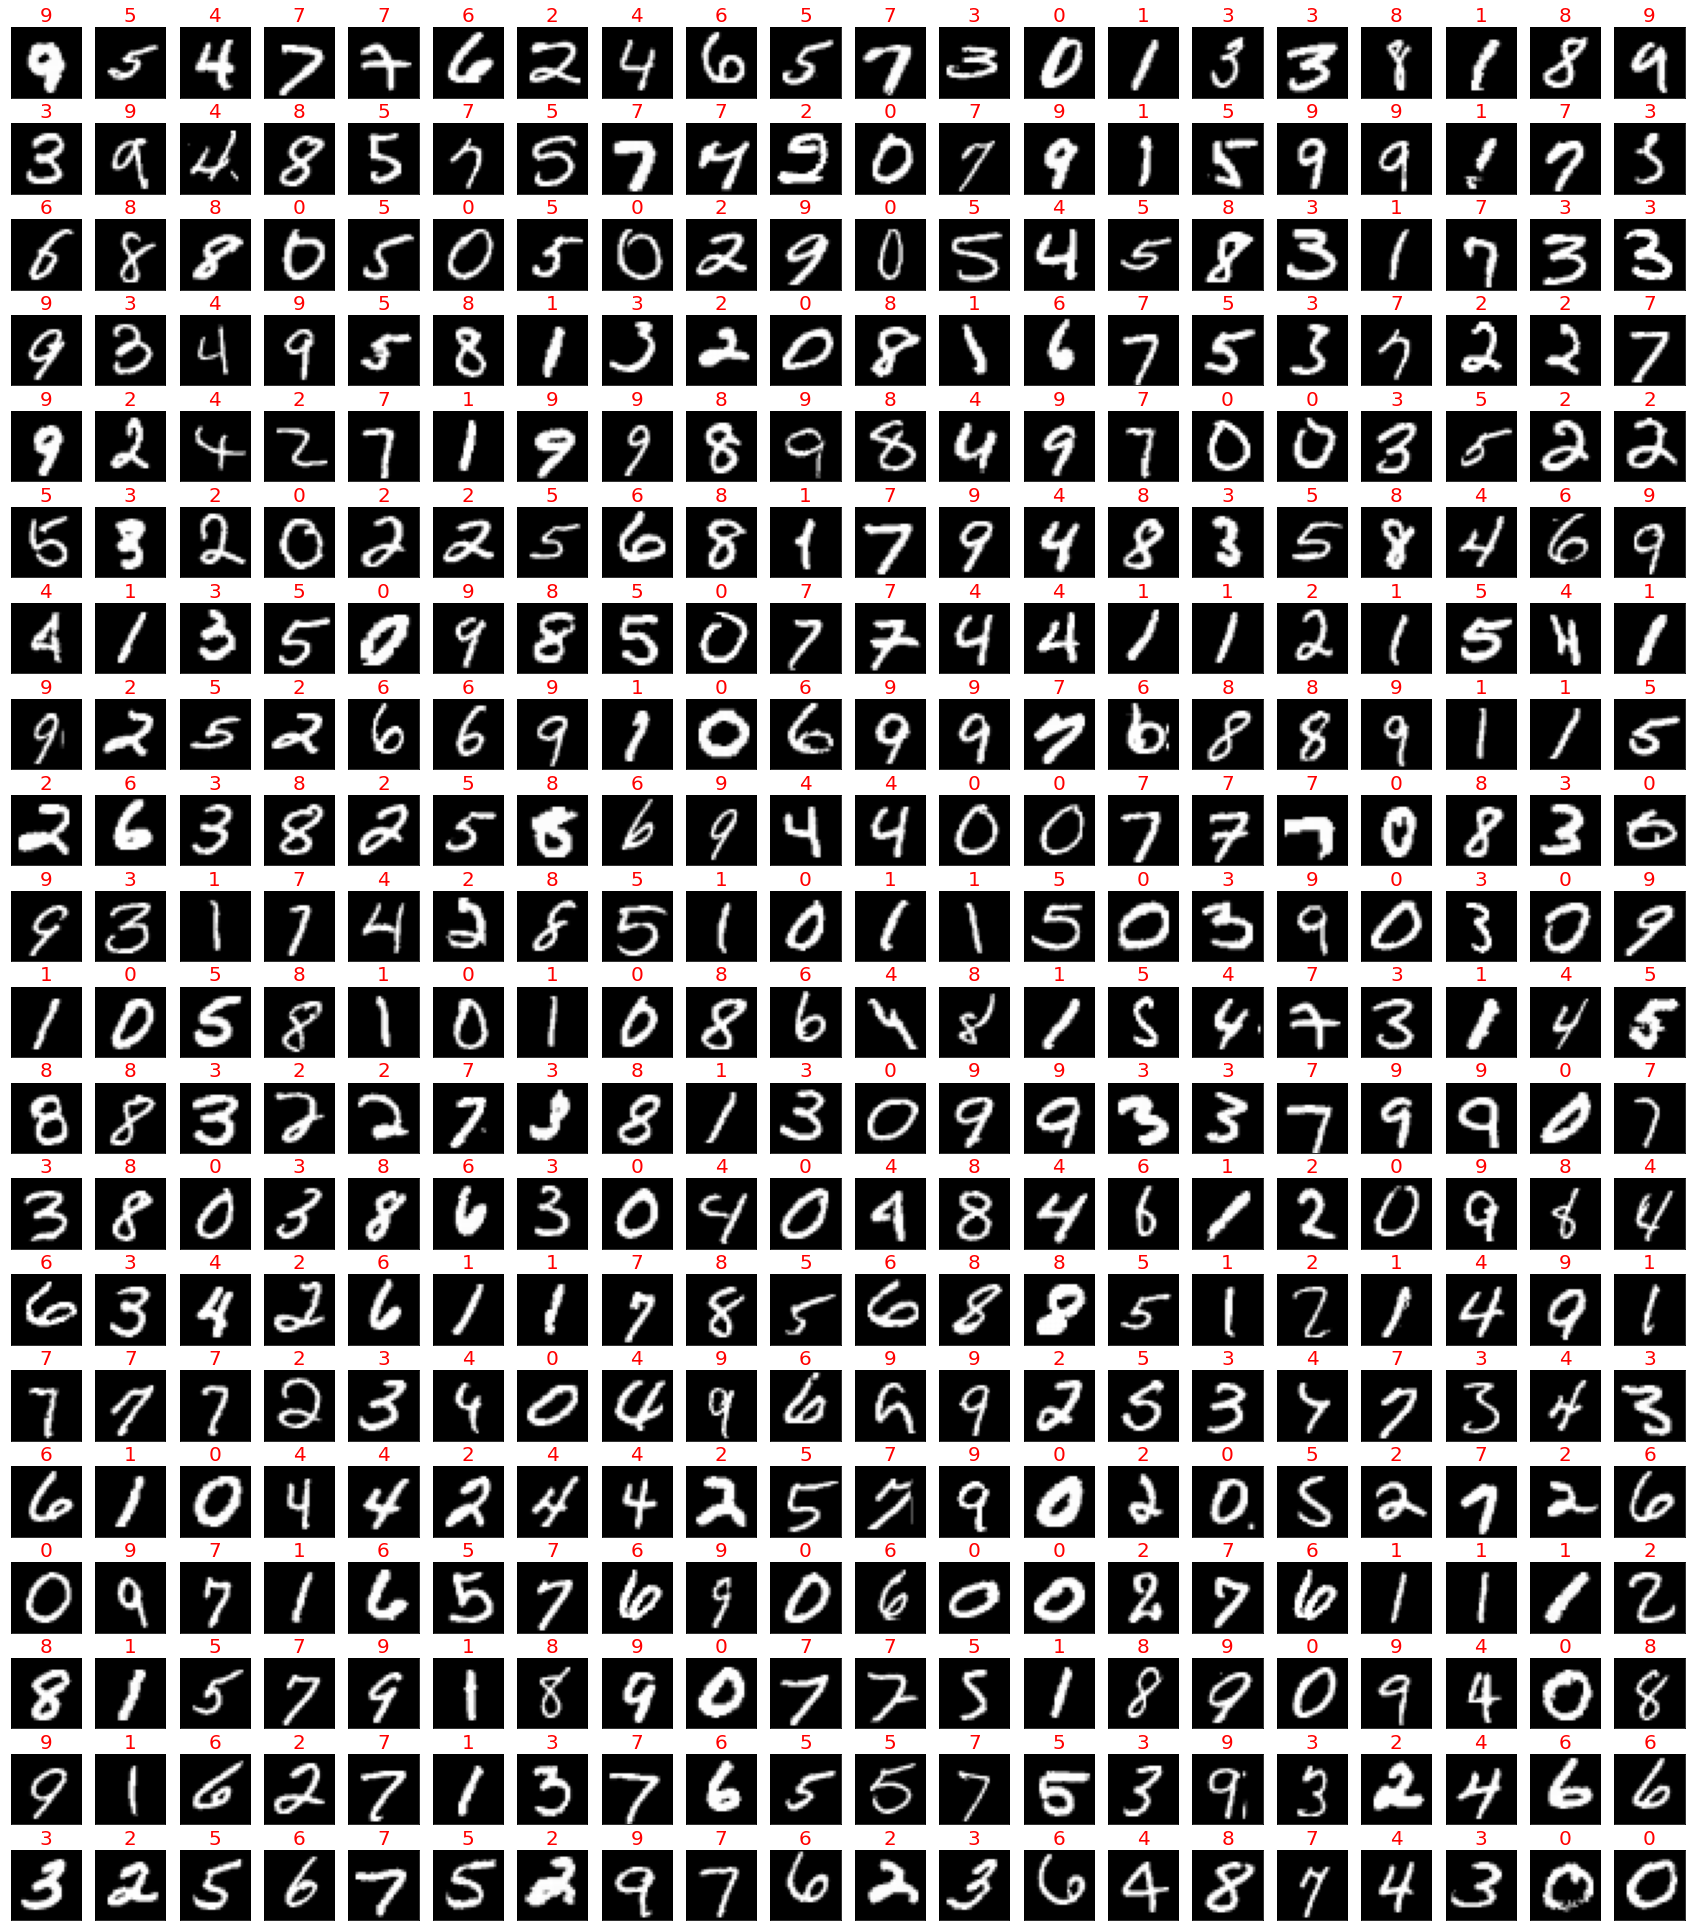

In [3]:
def show_images():
    array = np.random.randint(low=1,high=10000,size=400)
    fig = plt.figure(figsize=(30,35))
    for i in range(400):
        fig.add_subplot(20,20,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.title(y_train[array[i]],color='red',fontsize=20)
        plt.imshow(x_train[array[i]],cmap="gray")
show_images()

## One Hot Encoding

In [4]:
from tensorflow.keras.utils import to_categorical
y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)

## Normalizing Test and Training Images

In [5]:
x_train_norm = x_train / 255.
x_test_norm = x_test / 255.

## Model Creation

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adadelta, SGD
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Flatten, MaxPooling2D

In [7]:
model = Sequential([Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(100,activation='relu',kernel_initializer='he_uniform'),
                    BatchNormalization(),
                    Dense(10,activation='softmax')])

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])             

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Reshaping and Splitting Validation and Test Set

In [10]:
x_train_norm = x_train_norm.reshape((x_train_norm.shape[0],28,28,1))
x_test_norm = x_test_norm.reshape((x_test_norm.shape[0],28,28,1))
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
from sklearn.model_selection import train_test_split
x_val, x_test_, y_val, y_test_ = train_test_split(x_test_norm,y_test_enc,test_size=0.5)
print(x_val.shape)
print(y_val.shape)
print(x_test_.shape)
print(y_test_.shape)

(5000, 28, 28, 1)
(5000, 10)
(5000, 28, 28, 1)
(5000, 10)
